In [44]:
import numpy as np
# Import models
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.lof import LOF
from pyod.models.knn import KNN   # kNN detector
from pyod.utils.data import generate_data, get_outliers_inliers

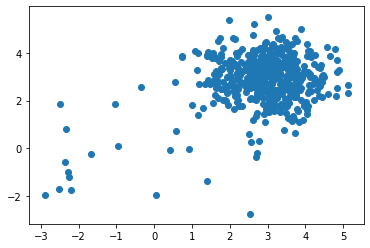

In [105]:
contamination = 0.05  # percentage of outliers
n_train = 500  # number of training points
n_test = 100  # number of testing points

X_train, y_train, X_test, y_test = generate_data(
    n_train=n_train, n_test=n_test, offset=10 ,n_features=3,contamination=contamination)

plt.scatter(X_train[:,0],X_train[:,1])

In [45]:
random_state = np.random.RandomState(42)
outliers_fraction = 0.05
# Define seven outlier detection tools to be compared
classifiers = {
        'Angle-based Outlier Detector (ABOD)': ABOD(contamination=outliers_fraction),
        'Cluster-based Local Outlier Factor (CBLOF)':CBLOF(contamination=outliers_fraction,check_estimator=False, random_state=random_state),
        'Feature Bagging':FeatureBagging(LOF(n_neighbors=35),contamination=outliers_fraction,check_estimator=False,random_state=random_state),
        'Histogram-base Outlier Detection (HBOS)': HBOS(contamination=outliers_fraction),
        'Isolation Forest': IForest(contamination=outliers_fraction,random_state=random_state),
        'K Nearest Neighbors (KNN)': KNN(contamination=outliers_fraction),
        'Average KNN': KNN(method='mean',contamination=outliers_fraction)
}

In [38]:
# train kNN detector
clf_name = 'KNN'
clf = KNN()
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

In [39]:
from pyod.utils.data import evaluate_print
# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)


On Training Data:
KNN ROC:0.9984, precision @ rank n:0.95

On Test Data:
KNN ROC:1.0, precision @ rank n:1.0


In [50]:
from sklearn.metrics import log_loss 
from sklearn.metrics import precision_recall_curve, average_precision_score 
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [53]:
def plot_curve(y_test=y_test,y_test_scores=y_test_scores):
    precision, recall, thresholds = precision_recall_curve(y_test,y_test_scores)
    average_precision = average_precision_score(y_test,y_test_scores)

    plt.step(recall, precision, color='k', alpha=0.7, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])

    plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
              average_precision))

    fpr, tpr, thresholds = roc_curve(y_test,y_test_scores)
    areaUnderROC = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: \
              Area under the curve = {0:0.2f}'.format(
              areaUnderROC))
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
#2d plot
from pyod.utils.example import visualize
%matplotlib inline
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=False)

In [48]:
'''Data Viz'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline

In [ ]:
anomalyScoresPCA = anomalyScores(X_train, X_train_PCA_inverse)
preds = plotResults(y_train, anomalyScoresPCA, True)

In [49]:
def anomalyScores(originalDF, reducedDF):
    loss = np.sum((np.array(originalDF)-np.array(reducedDF))**2, axis=1)
    loss = pd.Series(data=loss,index=originalDF.index)
    loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))
    return loss

def plotResults(trueLabels, anomalyScores, returnPreds = False):
    preds = pd.concat([trueLabels, anomalyScores], axis=1)
    preds.columns = ['trueLabel', 'anomalyScore']
    precision, recall, thresholds = \
        precision_recall_curve(preds['trueLabel'],preds['anomalyScore'])
    average_precision = \
        average_precision_score(preds['trueLabel'],preds['anomalyScore'])
    
    plt.step(recall, precision, color='k', alpha=0.7, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    
    plt.title('Precision-Recall curve: Average Precision = \
    {0:0.2f}'.format(average_precision))

    fpr, tpr, thresholds = roc_curve(preds['trueLabel'], \
                                     preds['anomalyScore'])
    areaUnderROC = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: \
    Area under the curve = {0:0.2f}'.format(areaUnderROC))
    plt.legend(loc="lower right")
    plt.show()
    
    if returnPreds==True:
        return preds
    
def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label", \
               data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Separation of Observations using "+algoName)

Angle-based Outlier Detector (ABOD)

On Training Data:
Angle-based Outlier Detector (ABOD) ROC:0.9854, precision @ rank n:0.68

On Test Data:
Angle-based Outlier Detector (ABOD) ROC:0.9242, precision @ rank n:0.8


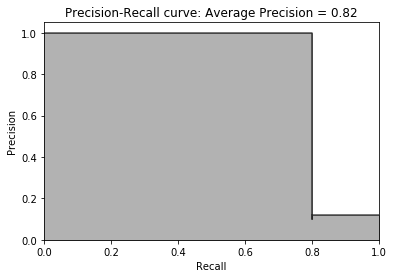

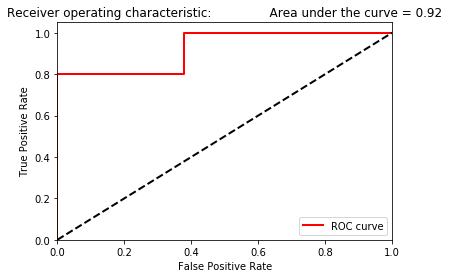

Cluster-based Local Outlier Factor (CBLOF)

On Training Data:
Cluster-based Local Outlier Factor (CBLOF) ROC:0.9934, precision @ rank n:0.84

On Test Data:
Cluster-based Local Outlier Factor (CBLOF) ROC:0.9979, precision @ rank n:0.8


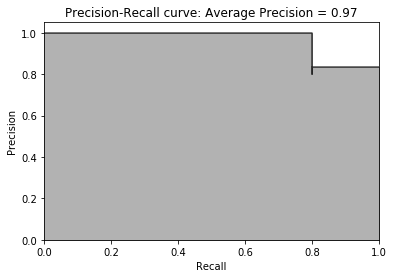

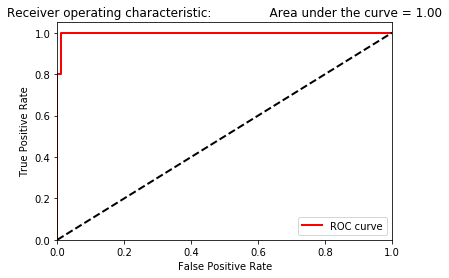

Feature Bagging

On Training Data:
Feature Bagging ROC:0.9973, precision @ rank n:0.88

On Test Data:
Feature Bagging ROC:1.0, precision @ rank n:1.0


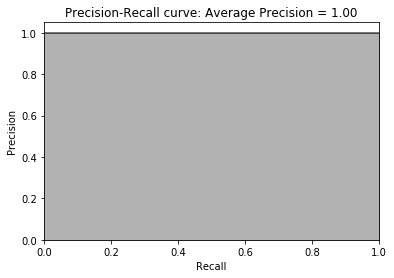

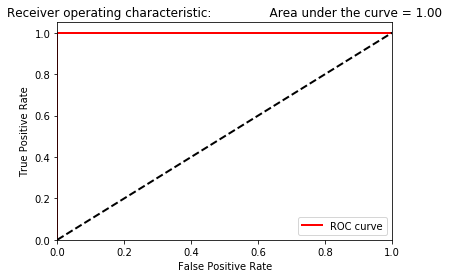

Histogram-base Outlier Detection (HBOS)

On Training Data:
Histogram-base Outlier Detection (HBOS) ROC:0.9884, precision @ rank n:0.84

On Test Data:
Histogram-base Outlier Detection (HBOS) ROC:0.9895, precision @ rank n:0.8


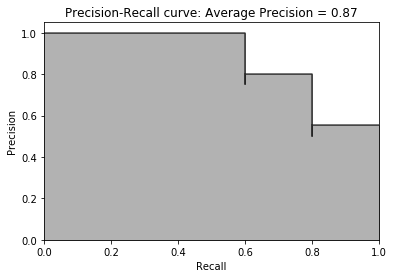

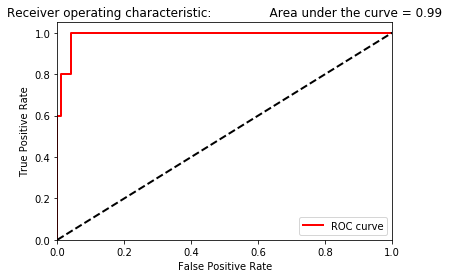

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


Isolation Forest

On Training Data:
Isolation Forest ROC:0.9948, precision @ rank n:0.84

On Test Data:
Isolation Forest ROC:0.9937, precision @ rank n:0.8


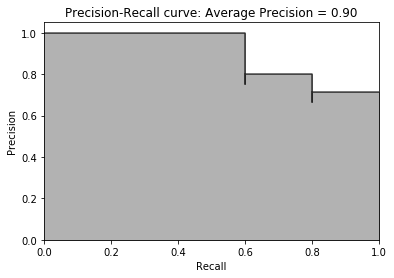

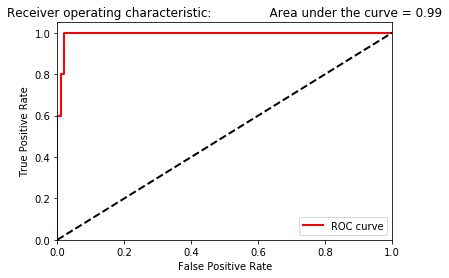

K Nearest Neighbors (KNN)

On Training Data:
K Nearest Neighbors (KNN) ROC:0.998, precision @ rank n:0.92

On Test Data:
K Nearest Neighbors (KNN) ROC:1.0, precision @ rank n:1.0


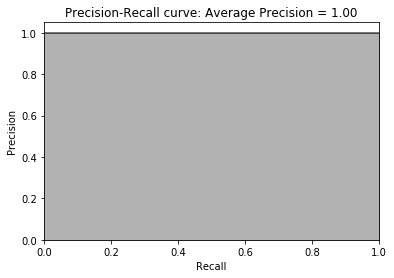

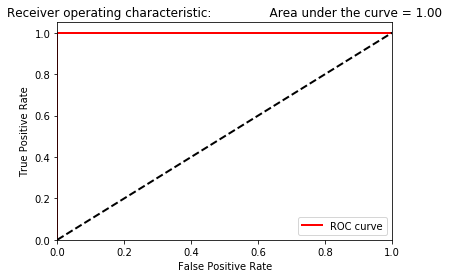

Average KNN

On Training Data:
Average KNN ROC:0.996, precision @ rank n:0.88

On Test Data:
Average KNN ROC:1.0, precision @ rank n:1.0


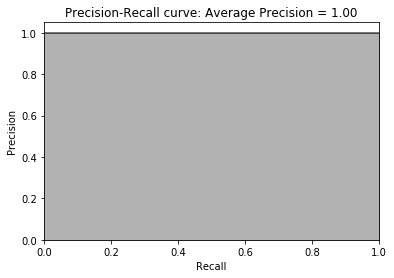

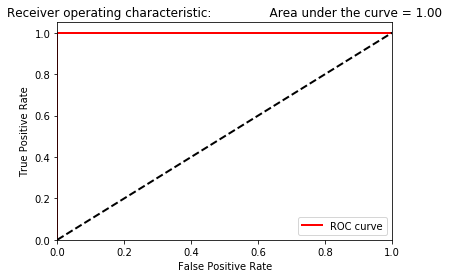

In [106]:
for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
    y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
    y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
    y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
    y_test_scores = clf.decision_function(X_test)  # outlier scores
    
    print(clf_name)
# evaluate and print the results
    print("\nOn Training Data:")
    evaluate_print(clf_name, y_train, y_train_scores)
    print("\nOn Test Data:")
    evaluate_print(clf_name, y_test, y_test_scores)
    plot_curve(y_test,y_test_scores)